<a href="https://colab.research.google.com/github/vishnu9358862212/Data-visualization-/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train_reshaped_normalized = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_reshaped_normalized = x_test.reshape(x_test.shape[0], -1) / 255.0

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_reshaped_normalized)
x_test_pca = pca.transform(x_test_reshaped_normalized)

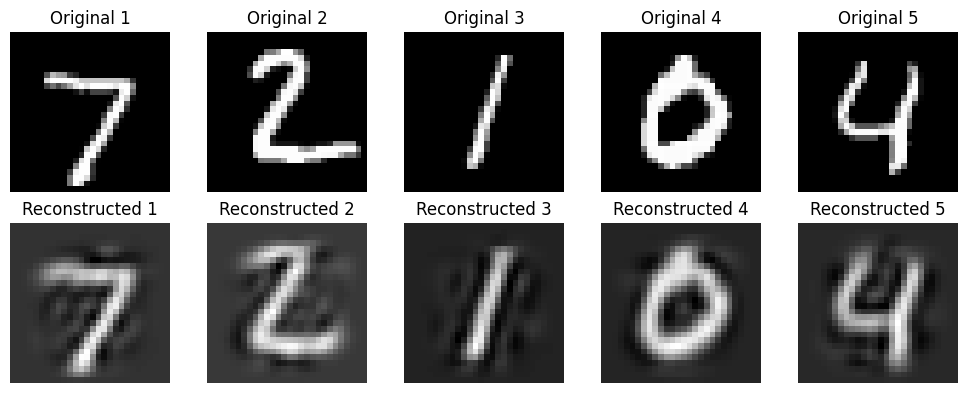

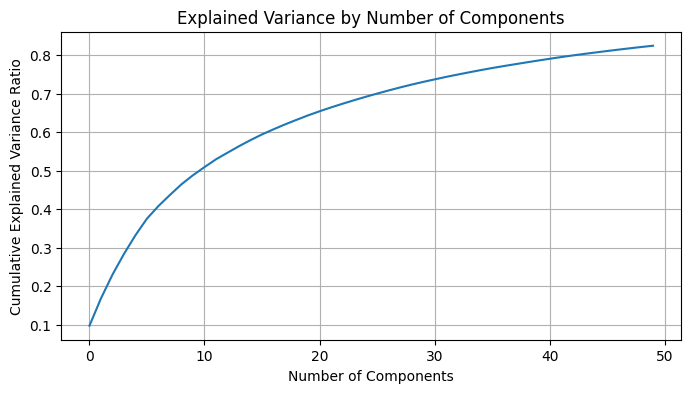

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_images_to_show = 5
fig, axes = plt.subplots(nrows=2, ncols=n_images_to_show, figsize=(10, 4))

x_test_reconstructed = pca.inverse_transform(x_test_pca)

for i in range(n_images_to_show):
    # Original image
    axes[0, i].imshow(x_test[i], cmap='gray')
    axes[0, i].set_title(f'Original {i+1}')
    axes[0, i].axis('off')

    # Reconstructed image
    axes[1, i].imshow(x_test_reconstructed[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Reconstructed {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [ ]:
print("Shape of x_train_pca:", x_train_pca.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test_pca:", x_test_pca.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train_pca: (60000, 50)
Shape of y_train: (60000,)
Shape of x_test_pca: (10000, 50)
Shape of y_test: (10000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train_pca, y_train)

SVC()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(x_train_pca.shape[1],)))
nn_model.add(Dense(10, activation='softmax'))

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model.fit(x_train_pca, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7954 - loss: 0.7178 - val_accuracy: 0.9477 - val_loss: 0.1775
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9538 - loss: 0.1589 - val_accuracy: 0.9643 - val_loss: 0.1254
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9696 - loss: 0.1073 - val_accuracy: 0.9713 - val_loss: 0.1020
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9768 - loss: 0.0787 - val_accuracy: 0.9739 - val_loss: 0.0918
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0653 - val_accuracy: 0.9749 - val_loss: 0.0873
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0548 - val_accuracy: 0.9747 - val_loss: 0.0844
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0458 - val_accuracy: 0.9769 - val_loss: 0.0795
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0381 - 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate Random Forest
rf_pred = rf_model.predict(x_test_pca)
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Model Evaluation:
Accuracy: 0.9539
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.95      0.95       892
           6       0.96      0.98      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
# Evaluate SVM
svm_pred = svm_model.predict(x_test_pca)
print("\nSVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Model Evaluation:
Accuracy: 0.9833
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Evaluate Neural Network
loss, accuracy = nn_model.evaluate(x_test_pca, y_test_encoded)
print("\nNeural Network Model Evaluation:")
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.0805

Neural Network Model Evaluation:
Loss: 0.06694133579730988, Accuracy: 0.9787999987602234
